## TRATAMIENTO DE DATOS
Lo primero que haremos será importar las librerías necesarias para este notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas.plotting import autocorrelation_plot

Disponemos de 3 bases de datos con la misma estructura. Importaremos las bases de datos y las uniremos:

In [2]:
dat2015 = pd.read_csv('BBDD-2015.csv', thousands='.')
dat2016 = pd.read_csv('BBDD-2016.csv', thousands='.')
dat2017 = pd.read_csv('BBDD-2017.csv', thousands='.')

In [3]:
dat = pd.concat([dat2015, dat2016, dat2017],ignore_index=True)

In [4]:
dat.head()

,Día,Dispositivo,Mes,Día de la semana,Región,Campaña,Impresiones,Clics,Conversiones,Coste,CTR,Posic. media,CPC medio,CPM medio,Coste medio,Coste/conv.,Porcentaje de conv.,Valor conv./coste,Valor conv. total,Valor/conv.
0,01-ene-2015,Móviles,Ene. 2015,Jueves,Islas Baleares,Shopping - General,100,3,"0,00","0,22 €","3,00 %","0,00","0,07 €","2,20 €","0,07 €","0,00 €","0,00 %","0,00","0,00","0,00"
1,26-ene-2015,Ordenadores,Ene. 2015,Lunes,Comunidad Valenciana,Shopping - General,1899,47,"2,00","4,72 €","2,47 %","0,00","0,10 €","2,49 €","0,10 €","2,36 €","4,26 %","40,95","193,30","96,65"
2,09-feb-2015,Tablets,Feb. 2015,Lunes,Aragón,Shopping - General,216,3,"0,00","0,34 €","1,39 %","0,00","0,11 €","1,57 €","0,11 €","0,00 €","0,00 %","0,00","0,00","0,00"
3,21-feb-2015,Móviles,Feb. 2015,Sábado,Cataluña,Shopping - General,1432,31,"1,00","3,17 €","2,16 %","0,00","0,10 €","2,21 €","0,10 €","3,17 €","3,23 %","10,63","33,69","33,69"
4,08-may-2015,Móviles,May. 2015,Viernes,Castilla-La Mancha,Shopping - General,233,8,"0,00","0,88 €","3,43 %","0,00","0,11 €","3,78 €","0,11 €","0,00 €","0,00 %","0,00","0,00","0,00"


In [5]:
# Seleccionamos las columnas que nos interesan. El resto son combinación lineal de las columnas seleccionadas.
dat = dat.iloc[:,0:10]

In [6]:
dat.dtypes

Día                 object
Dispositivo         object
Mes                 object
Día de la semana    object
Región              object
Campaña             object
Impresiones          int64
Clics                int64
Conversiones        object
Coste               object
dtype: object

In [7]:
# La columna 'Conversiones' es interpretada como string debido a que la separación de decimales viene marcada por comas.
# Para convertir la columna 'Conversiones' en formato numérico, definimos una función que reemplaza las comas por un punto. 
def punto_por_coma(a):
   return float(str(a).replace(',','.'))
dat['Conversiones'] = dat['Conversiones'].apply(punto_por_coma)

In [8]:
 dat['Coste'][0]

'0,22\xc2\xa0\xe2\x82\xac'

In [9]:
# Creamos una función para conseguir el valor numérico de la variable 'Coste'
def mod(a):
   return float(str(a).split('\xc2\xa0\xe2\x82\xac')[0].replace(',','.'))

dat['Coste'] = dat['Coste'].apply(mod)

In [10]:
# Vamos a transformar la columna Día para conseguir tenerla en formato fecha
dat['Día']=dat['Día'].str.replace('-ene-','/01/')
dat['Día']=dat['Día'].str.replace('-feb-','/02/')
dat['Día']=dat['Día'].str.replace('-mar-','/03/')
dat['Día']=dat['Día'].str.replace('-abr-','/04/')
dat['Día']=dat['Día'].str.replace('-may-','/05/')
dat['Día']=dat['Día'].str.replace('-jun-','/06/')
dat['Día']=dat['Día'].str.replace('-jul-','/07/')
dat['Día']=dat['Día'].str.replace('-ago-','/08/')
dat['Día']=dat['Día'].str.replace('-sep-','/09/')
dat['Día']=dat['Día'].str.replace('-oct-','/10/')
dat['Día']=dat['Día'].str.replace('-nov-','/11/')
dat['Día']=dat['Día'].str.replace('-dic-','/12/')

In [11]:
def fec(f):
   return datetime.strptime(f, '%d/%m/%Y')

dat['Día'] = dat['Día'].apply(fec)

In [12]:
dat.dtypes

Día                 datetime64[ns]
Dispositivo                 object
Mes                         object
Día de la semana            object
Región                      object
Campaña                     object
Impresiones                  int64
Clics                        int64
Conversiones               float64
Coste                      float64
dtype: object

In [13]:
dat.head()

,Día,Dispositivo,Mes,Día de la semana,Región,Campaña,Impresiones,Clics,Conversiones,Coste
0,2015-01-01,Móviles,Ene. 2015,Jueves,Islas Baleares,Shopping - General,100,3,0.0,0.22
1,2015-01-26,Ordenadores,Ene. 2015,Lunes,Comunidad Valenciana,Shopping - General,1899,47,2.0,4.72
2,2015-02-09,Tablets,Feb. 2015,Lunes,Aragón,Shopping - General,216,3,0.0,0.34
3,2015-02-21,Móviles,Feb. 2015,Sábado,Cataluña,Shopping - General,1432,31,1.0,3.17
4,2015-05-08,Móviles,May. 2015,Viernes,Castilla-La Mancha,Shopping - General,233,8,0.0,0.88


In [14]:
dat.rename(columns={'Día':'Dia'}, inplace = True)
dat.rename(columns={'Día de la semana':'Dia_semana'}, inplace = True)

In [15]:
# De momento descartamos la segmentación por dispositivo y geográfica y nos quedamos con las variables numéricas.
ser = dat.groupby(by='Dia').sum().reset_index()

In [16]:
len(ser)

996

In [17]:
ser.head()

,Dia,Impresiones,Clics,Conversiones,Coste
0,2015-01-01,24025,468,1.0,65.62
1,2015-01-02,33939,758,8.0,104.24
2,2015-01-03,28889,616,5.0,80.37
3,2015-01-04,20716,420,3.0,53.13
4,2015-01-05,17557,328,1.0,40.79


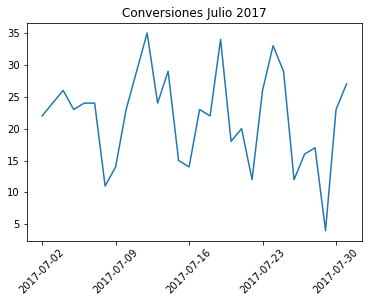

In [18]:
plt_ser = ser.loc[(ser.Dia>'2017-07-01') & (ser.Dia<='2017-07-31')]
plt.plot(plt_ser['Dia'], plt_ser['Conversiones'])
plt.title('Conversiones Julio 2017')
plt.xticks(rotation=45)
plt.show()

Vamos a comprobar si hay días para los que no existe registro de datos. Si esto ocurre, interpolaremos para estimar los valores perdidos de estos días.

In [19]:
min_date = min(ser['Dia'])
min_date

Timestamp('2015-01-01 00:00:00')

In [20]:
max_date = max(ser['Dia'])
max_date

Timestamp('2017-09-30 00:00:00')

In [21]:
everyday = pd.date_range(min_date, max_date, freq='D')
everyday

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2017-09-21', '2017-09-22', '2017-09-23', '2017-09-24',
               '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
               '2017-09-29', '2017-09-30'],
              dtype='datetime64[ns]', length=1004, freq='D')

In [22]:
ser.index = ser['Dia']
ser2 = ser.reindex(everyday)

In [23]:
ser2

,Dia,Impresiones,Clics,Conversiones,Coste
2015-01-01,2015-01-01,24025.0,468.0,1.0,65.62
2015-01-02,2015-01-02,33939.0,758.0,8.0,104.24
2015-01-03,2015-01-03,28889.0,616.0,5.0,80.37
2015-01-04,2015-01-04,20716.0,420.0,3.0,53.13
2015-01-05,2015-01-05,17557.0,328.0,1.0,40.79
2015-01-06,2015-01-06,31641.0,668.0,4.0,88.80
2015-01-07,2015-01-07,30969.0,630.0,5.0,81.32
2015-01-08,2015-01-08,28952.0,586.0,3.0,74.69
2015-01-09,2015-01-09,30228.0,581.0,4.0,77.50
2015-01-10,2015-01-10,32049.0,598.0,4.0,76.28


In [24]:
ser2[ser2.isnull().all(axis=1)]

,Dia,Impresiones,Clics,Conversiones,Coste
2015-05-09,NaT,NaN,NaN,NaN,NaN
2015-05-10,NaT,NaN,NaN,NaN,NaN
2016-01-03,NaT,NaN,NaN,NaN,NaN
2016-01-04,NaT,NaN,NaN,NaN,NaN
2016-02-06,NaT,NaN,NaN,NaN,NaN
2016-02-07,NaT,NaN,NaN,NaN,NaN
2017-09-23,NaT,NaN,NaN,NaN,NaN
2017-09-24,NaT,NaN,NaN,NaN,NaN


In [25]:
ser2.isnull().sum()

Dia             8
Impresiones     8
Clics           8
Conversiones    8
Coste           8
dtype: int64

In [26]:
ser2.loc[ser2.isnull().all(axis=1), 'Dia'] = ser2.loc[ser2.isnull().all(axis=1)].index

In [27]:
ser2 = ser2.interpolate()

In [28]:
ser2.tail(20)

,Dia,Impresiones,Clics,Conversiones,Coste
2017-09-11,2017-09-11,80821.0,1483.0,10.0,121.780000
2017-09-12,2017-09-12,82197.0,1508.0,17.0,118.720000
2017-09-13,2017-09-13,76829.0,1412.0,21.0,104.940000
2017-09-14,2017-09-14,79391.0,1484.0,18.0,108.610000
2017-09-15,2017-09-15,78147.0,1681.0,28.0,126.230000
2017-09-16,2017-09-16,50135.0,1095.0,6.0,74.070000
2017-09-17,2017-09-17,102622.0,2305.0,22.0,159.070000
2017-09-18,2017-09-18,94739.0,2006.0,24.0,154.250000
2017-09-19,2017-09-19,85355.0,1875.0,12.0,144.020000
2017-09-20,2017-09-20,101779.0,2254.0,30.0,173.910000


In [29]:
ser2.isnull().sum()

Dia             0
Impresiones     0
Clics           0
Conversiones    0
Coste           0
dtype: int64

## EXPLORACIÓN DE LOS DATOS

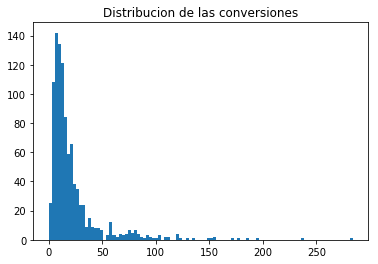

In [30]:
plt.hist(ser2['Conversiones'].dropna(), bins=100)
plt.title('Distribucion de las conversiones')
plt.show()

In [31]:
ser2.describe()

,Impresiones,Clics,Conversiones,Coste
count,1004.00000,1004.000000,1004.000000,1004.000000
mean,74989.52490,1653.665339,21.989044,215.786205
std,61598.12088,1612.502118,26.962377,234.568659
min,2716.00000,32.000000,0.000000,5.450000
25%,39803.75000,717.250000,8.000000,79.300000
50%,57130.50000,1150.000000,14.000000,128.815000
75%,86962.25000,1934.500000,23.000000,246.407500
max,427920.00000,11738.000000,284.000000,1365.600000


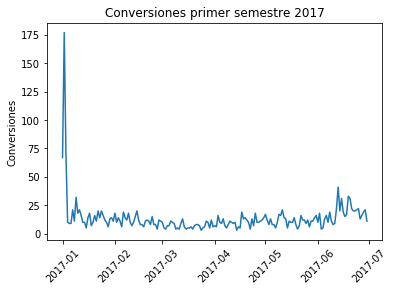

In [32]:
plt_ser2 = ser2.copy().loc[(ser2['Dia']>='2017-01-01') & (ser2['Dia']<'2017-07-01'), ]
plt.plot(plt_ser2['Dia'], plt_ser2['Conversiones'], markersize=1)
plt.title('Conversiones primer semestre 2017')
plt.ylabel('Conversiones')
plt.xticks(rotation=45)
plt.show()

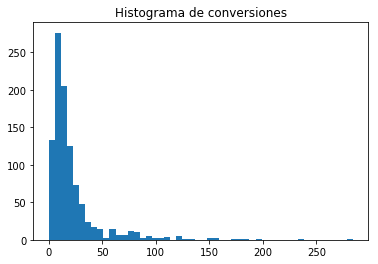

In [33]:
plt.hist(ser2['Conversiones'].dropna(), bins=50)
plt.title('Histograma de conversiones')
plt.show()

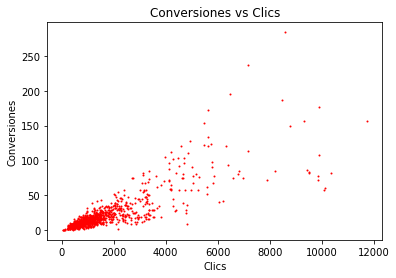

In [34]:
plt.plot(ser2['Clics'], ser2['Conversiones'], 'ro', markersize=1)
plt.title('Conversiones vs Clics')
plt.xlabel('Clics')
plt.ylabel('Conversiones')
plt.show()

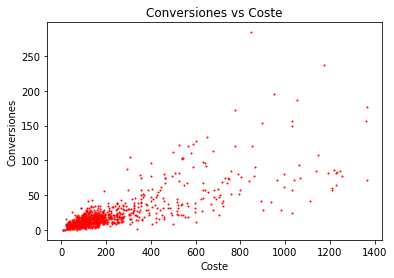

In [35]:
plt.plot(ser2['Coste'], ser2['Conversiones'], 'ro', markersize=1)
plt.title('Conversiones vs Coste')
plt.xlabel('Coste')
plt.ylabel('Conversiones')
plt.show()

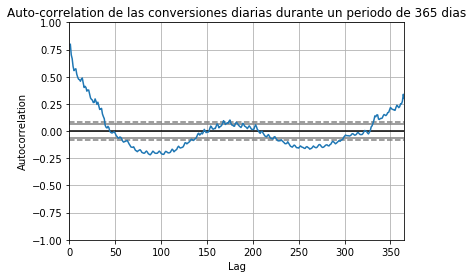

In [36]:
autocorrelation_plot(ser2['Conversiones'].dropna())
plt.xlim(0,365)
plt.title('Auto-correlation de las conversiones diarias durante un periodo de 365 dias')
plt.show()

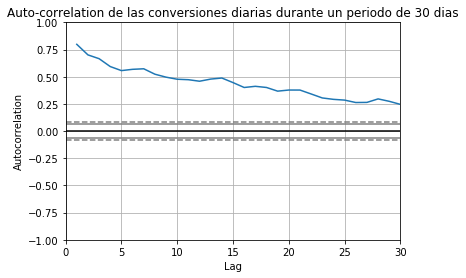

In [37]:
autocorrelation_plot(ser2['Conversiones'].dropna())
plt.xlim(0,30)
plt.title('Auto-correlation de las conversiones diarias durante un periodo de 30 dias')
plt.show()

En la gráfica superior observamos que el número de conversiones de un día determinado está relacionado con el número de conversiones de los días previos y los días posteriores.

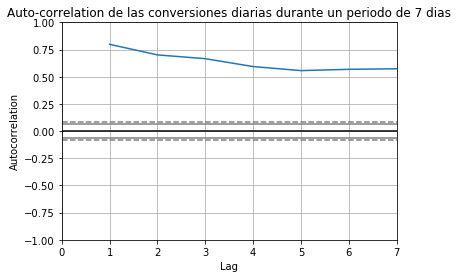

In [38]:
autocorrelation_plot(ser2['Conversiones'].dropna())
plt.xlim(0,7)
plt.title('Auto-correlation de las conversiones diarias durante un periodo de 7 dias')
plt.show()

## Elaboración de features para el modelo de predicción

In [39]:
ser2_features = ser2.copy()

In [40]:
ser2_features['dia_semana'] = ser2_features.Dia.dt.dayofweek
ser2_features['mes'] = ser2_features.Dia.dt.month-1

In [41]:
def lagged_features(dataframe, variable, max_periodo):
    for t in range(1, max_periodo+1):
        dataframe[variable+'_lag'+str(t)] = dataframe[variable].shift(t, freq='1D')

In [42]:
lagged_features(ser2_features, 'Conversiones', 10)
lagged_features(ser2_features, 'Coste', 10)

In [43]:
ser2_features.head()

,Dia,Impresiones,Clics,Conversiones,Coste,dia_semana,mes,Conversiones_lag1,Conversiones_lag2,Conversiones_lag3,...,Coste_lag1,Coste_lag2,Coste_lag3,Coste_lag4,Coste_lag5,Coste_lag6,Coste_lag7,Coste_lag8,Coste_lag9,Coste_lag10
2015-01-01,2015-01-01,24025.0,468.0,1.0,65.62,3,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,33939.0,758.0,8.0,104.24,4,0,1.0,NaN,NaN,...,65.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,28889.0,616.0,5.0,80.37,5,0,8.0,1.0,NaN,...,104.24,65.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,20716.0,420.0,3.0,53.13,6,0,5.0,8.0,1.0,...,80.37,104.24,65.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,17557.0,328.0,1.0,40.79,0,0,3.0,5.0,8.0,...,53.13,80.37,104.24,65.62,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Contamos los valores nulos
ser2_features.isnull().sum()

Dia                    0
Impresiones            0
Clics                  0
Conversiones           0
Coste                  0
dia_semana             0
mes                    0
Conversiones_lag1      1
Conversiones_lag2      2
Conversiones_lag3      3
Conversiones_lag4      4
Conversiones_lag5      5
Conversiones_lag6      6
Conversiones_lag7      7
Conversiones_lag8      8
Conversiones_lag9      9
Conversiones_lag10    10
Coste_lag1             1
Coste_lag2             2
Coste_lag3             3
Coste_lag4             4
Coste_lag5             5
Coste_lag6             6
Coste_lag7             7
Coste_lag8             8
Coste_lag9             9
Coste_lag10           10
dtype: int64

In [45]:
ser2_features.loc[ser2_features.isnull().any(axis=1), ].shape[0]

10

In [46]:
# Al ser una pequeña proporción de datos nulos podemos que además coinciden con el inicio de la serie podemos descartarlos.
ser2_features.dropna(how='any', inplace=True)

In [47]:
ser2_features.head()

,Dia,Impresiones,Clics,Conversiones,Coste,dia_semana,mes,Conversiones_lag1,Conversiones_lag2,Conversiones_lag3,...,Coste_lag1,Coste_lag2,Coste_lag3,Coste_lag4,Coste_lag5,Coste_lag6,Coste_lag7,Coste_lag8,Coste_lag9,Coste_lag10
2015-01-11,2015-01-11,40490.0,709.0,6.0,92.36,6,0,4.0,4.0,3.0,...,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37,104.24,65.62
2015-01-12,2015-01-12,37826.0,690.0,6.0,89.62,0,0,6.0,4.0,4.0,...,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37,104.24
2015-01-13,2015-01-13,39804.0,787.0,10.0,101.76,1,0,6.0,6.0,4.0,...,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13,80.37
2015-01-14,2015-01-14,41566.0,831.0,5.0,111.02,2,0,10.0,6.0,6.0,...,101.76,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79,53.13
2015-01-15,2015-01-15,40663.0,771.0,7.0,102.51,3,0,5.0,10.0,6.0,...,111.02,101.76,89.62,92.36,76.28,77.50,74.69,81.32,88.80,40.79


In [48]:
# Dividimos los datos en datasets de entrenamiento y prueba (train y test)
# Todos los datos posteriores al 1 de agosto de 2017 están reservados para el conjunto de prueba.
train, test = (ser2_features.loc[ser2_features['Dia']<'2017-08-01'], ser2_features.loc[ser2_features['Dia']>='2017-08-01'])
train.to_csv('train.csv')
test.to_csv('test.csv')